In [1]:
import jax
import jax.numpy as jnp
from functools import partial
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
# a = jnp.ones(7500).reshape(3,2500)
# b = {'A':jnp.ones(2500), 'B':jnp.ones(2500), 'C':jnp.ones(2500)}
# c = np.ones(7500).reshape(3,2500)
# d = [jnp.ones(2500), jnp.ones(2500), jnp.ones(2500)]
from env import *
def render_wall(grid_size, wall_maze):
    fig, ax = plt.subplots(figsize=(3,3),frameon=True)
    ax.grid(visible=True)
    ax.set_xlim(0,grid_size)
    ax.set_ylim(grid_size,0)
    wall_loc = np.where(wall_maze==1)
    for i in range(len(wall_loc[0])):
        r, c, a = wall_loc[0][i], wall_loc[1][i], wall_loc[2][i] # already in matrix coordinates
        if a == 0:
            start_r = np.array([r+1, r+1])
            start_c = np.array([c, c+1])
        elif a == 1:
            start_r = np.array([r, r])
            start_c = np.array([c, c+1])
        elif a == 2:
            start_r = np.array([r, r+1])
            start_c = np.array([c+1, c+1])
        elif a == 3:
            start_r = np.array([r, r+1])
            start_c = np.array([c, c])
        line = mpl.lines.Line2D(start_c, start_r, color='blue', linewidth=5)
        ax.add_line(line)
    ax.xaxis.set_tick_params(bottom=False, top=True, labeltop=True, labelbottom=False)
    plt.show()

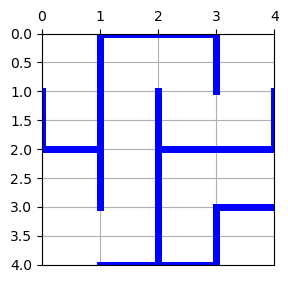

In [3]:
maze_list = np.load('maze_list.npy')
maze = maze_list[0]
render_wall(maze.shape[0], maze)


In [4]:
def render(goal_s, wall_maze, s, grid_size):
    fig, ax = plt.subplots(figsize=(3,3),frameon=True)
    ax.grid(visible=True)
    ax.set_xlim(0,grid_size)
    ax.set_ylim(grid_size,0)
    rect = mpl.patches.Rectangle((goal_s[1], goal_s[0]), width=1, height=1, facecolor='yellow')
    ax.add_patch(rect)
    circle = mpl.patches.Circle((s[1]+0.5, s[0]+0.5), radius=0.3, facecolor='red')
    ax.add_patch(circle)
    wall_loc = np.where(wall_maze==1)
    for i in range(len(wall_loc[0])):
        r, c, a = wall_loc[0][i], wall_loc[1][i], wall_loc[2][i] # already in matrix coordinates
        if a == 0:
            start_r = np.array([r+1, r+1])
            start_c = np.array([c, c+1])
        elif a == 1:
            start_r = np.array([r, r])
            start_c = np.array([c, c+1])
        elif a == 2:
            start_r = np.array([r, r+1])
            start_c = np.array([c+1, c+1])
        elif a == 3:
            start_r = np.array([r, r+1])
            start_c = np.array([c, c])
        line = mpl.lines.Line2D(start_c, start_r, color='blue', linewidth=5)
        ax.add_line(line)
    ax.xaxis.set_tick_params(bottom=False, top=True, labeltop=True, labelbottom=False)
    plt.show()

In [12]:

grid_size = 4
n_agents = 2
n_action = 4
key = jax.random.PRNGKey(0)
# keys = jax.random.split(key, n_agent)
# start_location, env_state = jax.vmap(partial(reset, grid_size=grid_size))(keys)
wall_maze = jnp.repeat(maze_list[0].reshape(1,grid_size,grid_size,n_action), n_agents, axis=0)
env_state = {'wall_maze':wall_maze}
start_location, env_state = reset(grid_size=grid_size, key=key, n_agents=n_agents, env_state=env_state)
print(start_location)
print(env_state['goal_s'].shape)
print(env_state['reward_map'].shape)
print(env_state['start_s'].shape)
print(env_state['wall_maze'].shape)
s = start_location
n_action = 4


[[1 1]
 [2 1]]
(2, 2)
(2, 4, 4)
(2, 2)
(2, 4, 4, 4)


reward-map: [[0 1 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
[[1 1]
 [2 1]]
[[0]
 [0]]
[0. 0.]
[[2 1]
 [3 1]]
[[[0 1 0 0]
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 1]
  [0 0 0 0]]]
[[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
next_s: [2 1] r: [0] done: [0] start_s: [1 1]


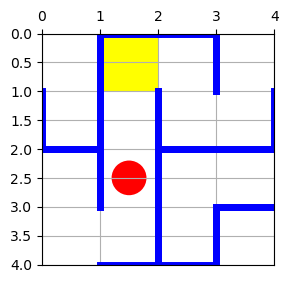

reward-map: [[0 1 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
[[2 1]
 [3 1]]
[[1]
 [1]]
[0. 0.]
[[1 1]
 [2 1]]
[[[0 1 0 0]
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 1]
  [0 0 0 0]]]
[[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
next_s: [1 1] r: [0] done: [0] start_s: [1 1]


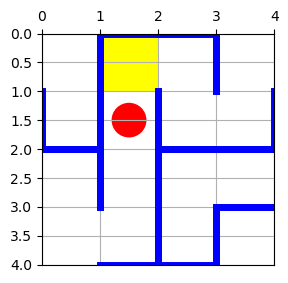

reward-map: [[0 1 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
[[1 1]
 [2 1]]
[[1]
 [1]]
[0. 0.]
[[0 1]
 [1 1]]
[[[0 1 0 0]
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 1]
  [0 0 0 0]]]
[[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
next_s: [2 3] r: [1] done: [1] start_s: [2 3]


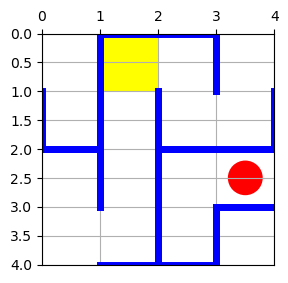

reward-map: [[0 1 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
[[2 3]
 [1 1]]
[[1]
 [1]]
[1. 0.]
[[2 3]
 [0 1]]
[[[0 1 0 0]
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 1]
  [0 0 0 0]]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
next_s: [1 1] r: [0] done: [0] start_s: [1 1]


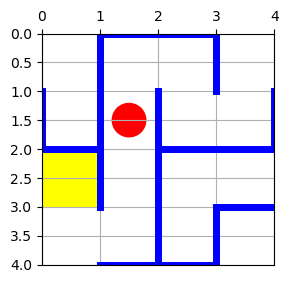

reward-map: [[0 0 0 0]
 [0 0 0 0]
 [1 0 0 0]
 [0 0 0 0]]
[[1 1]
 [3 0]]
[[1]
 [1]]
[0. 0.]
[[0 1]
 [2 0]]
[[[0 0 0 0]
  [0 0 0 0]
  [1 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  [0 0 1 0]]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
next_s: [0 1] r: [0] done: [0] start_s: [1 1]


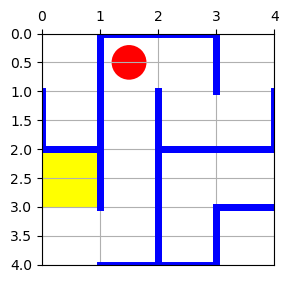

reward-map: [[0 0 0 0]
 [0 0 0 0]
 [1 0 0 0]
 [0 0 0 0]]
[[0 1]
 [2 0]]
[[1]
 [1]]
[1. 1.]
[[0 1]
 [2 0]]
[[[0 0 0 0]
  [0 0 0 0]
  [1 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  [0 0 1 0]]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
next_s: [0 1] r: [0] done: [0] start_s: [1 1]


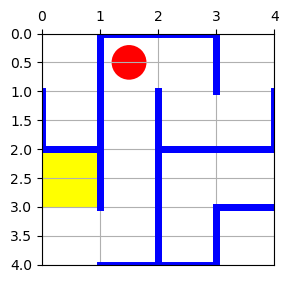

reward-map: [[0 0 0 0]
 [0 0 0 0]
 [1 0 0 0]
 [0 0 0 0]]
[[0 1]
 [2 0]]
[[2]
 [2]]
[0. 1.]
[[0 2]
 [2 0]]
[[[0 0 0 0]
  [0 0 0 0]
  [1 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  [0 0 1 0]]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]]
next_s: [0 2] r: [0] done: [0] start_s: [1 1]


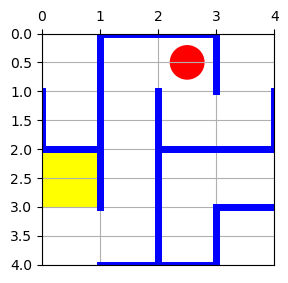

reward-map: [[0 0 0 0]
 [0 0 0 0]
 [1 0 0 0]
 [0 0 0 0]]
[[0 2]
 [2 0]]
[[0]
 [0]]
[0. 0.]
[[1 2]
 [3 0]]
[[[0 0 0 0]
  [0 0 0 0]
  [1 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  [0 0 1 0]]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]]
next_s: [0 3] r: [0] done: [0] start_s: [0 3]


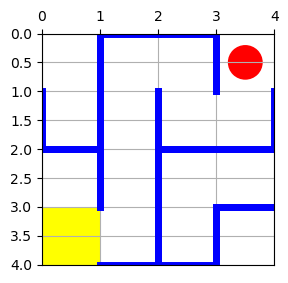

reward-map: [[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [1 0 0 0]]
[[0 3]
 [2 1]]
[[1]
 [1]]
[0. 0.]
[[3 3]
 [1 1]]
[[[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  [1 0 0 0]]

 [[1 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]]
next_s: [3 3] r: [0] done: [0] start_s: [0 3]


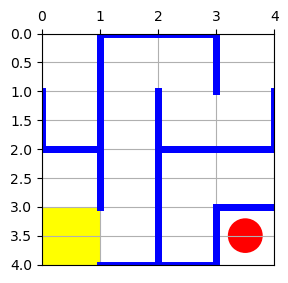

reward-map: [[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [1 0 0 0]]
[[3 3]
 [1 1]]
[[2]
 [2]]
[0. 1.]
[[3 0]
 [1 1]]
[[[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  [1 0 0 0]]

 [[1 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]]
next_s: [3 1] r: [1] done: [1] start_s: [3 1]


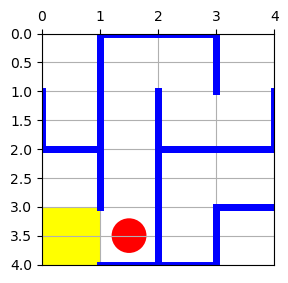

reward-map: [[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [1 0 0 0]]
[[3 1]
 [1 1]]
[[3]
 [3]]
[0. 1.]
[[3 0]
 [1 1]]
[[[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  [1 0 0 0]]

 [[1 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 0.]]
next_s: [3 2] r: [1] done: [1] start_s: [3 2]


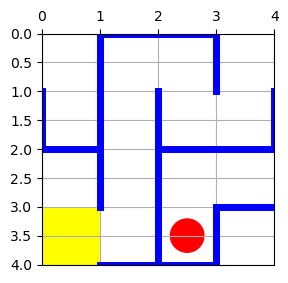

reward-map: [[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [1 0 0 0]]
[[3 2]
 [1 1]]
[[0]
 [0]]
[1. 0.]
[[3 2]
 [2 1]]
[[[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  [1 0 0 0]]

 [[1 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]]
[[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
next_s: [0 3] r: [0] done: [0] start_s: [0 3]


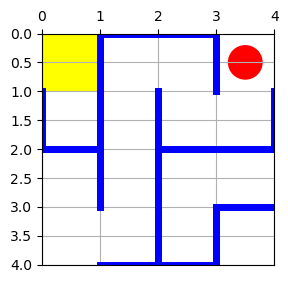

reward-map: [[1 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
[[0 3]
 [0 0]]
[[3]
 [3]]
[1. 0.]
[[0 3]
 [0 3]]
[[[1 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [1 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]]
[[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
next_s: [0 3] r: [0] done: [0] start_s: [0 3]


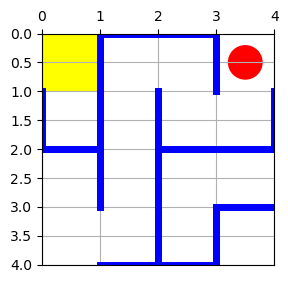

reward-map: [[1 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
[[0 3]
 [0 3]]
[[2]
 [2]]
[0. 0.]
[[0 0]
 [0 0]]
[[[1 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [1 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]]
[[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
next_s: [1 3] r: [1] done: [1] start_s: [1 3]


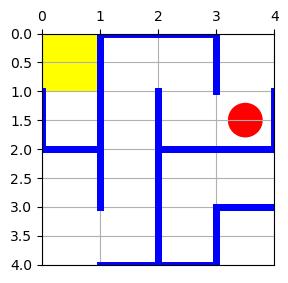

reward-map: [[1 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
[[1 3]
 [0 0]]
[[1]
 [1]]
[0. 0.]
[[0 3]
 [3 0]]
[[[1 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [1 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]]
[[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
next_s: [0 3] r: [0] done: [0] start_s: [1 3]


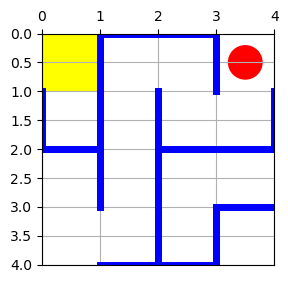

reward-map: [[1 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
[[0 3]
 [3 0]]
[[0]
 [0]]
[0. 0.]
[[1 3]
 [0 0]]
[[[1 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [1 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]]
[[0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
next_s: [0 3] r: [0] done: [0] start_s: [0 3]


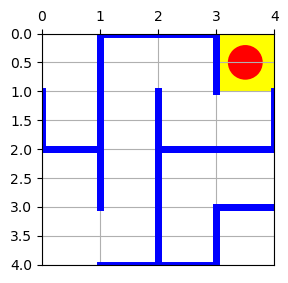

reward-map: [[0 0 0 1]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
[[0 3]
 [2 1]]
[[1]
 [1]]
[0. 0.]
[[3 3]
 [1 1]]
[[[0 0 0 1]
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  [0 1 0 0]]]
[[0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
next_s: [3 3] r: [0] done: [0] start_s: [0 3]


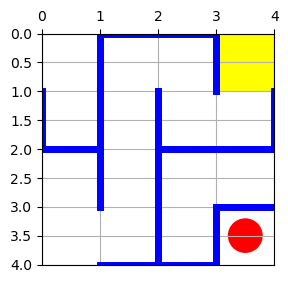

In [13]:
s = env_state['start_s']
a_list = jnp.array([0,1,1,1,1,1,2,0,1,2,3,0,3,2,1,0,1]).reshape(-1,1,1).repeat(n_agents, axis=1)
for i,a in enumerate(a_list):
    key, subkey = jax.random.split(key)
    print('reward-map:',env_state['reward_map'][0])
    next_s, reward, done, env_state = step(subkey, env_state, s, a)
    obs = get_obs(env_state, next_s)
    if i%4 == 4-1:
        key, subkey = jax.random.split(key)
        start_location, env_state = reset(grid_size=grid_size, key=key, n_agents=n_agents, env_state=env_state)
        next_s = start_location
        obs = get_obs(env_state, next_s)
    print(obs[0,...,-1])
    print('next_s:',next_s[0], 'r:', reward[0], 'done:', env_state['done'][0], 'start_s:', env_state['start_s'][0])
    for j in range(1):
        render(env_state['goal_s'][j], env_state['wall_maze'][j], next_s[j], grid_size)
    s = next_s
    

In [7]:
grid_col, grid_row = jnp.meshgrid(jnp.arange(4), jnp.arange(4), indexing='xy')
pc_centers = jnp.concatenate((grid_row.reshape(-1, 1), grid_col.reshape(-1, 1)), axis=-1)
print(pc_centers)

[[0 0]
 [0 1]
 [0 2]
 [0 3]
 [1 0]
 [1 1]
 [1 2]
 [1 3]
 [2 0]
 [2 1]
 [2 2]
 [2 3]
 [3 0]
 [3 1]
 [3 2]
 [3 3]]


In [22]:
from flax.training import checkpoints
import os

d = {'a':1, 'b':2}
checkpoints.save_checkpoint('test', d, step=1, overwrite=True)
a = checkpoints.restore_checkpoint('test', None)
print(a)

2024-10-18 07:53:47.365116: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-18 07:53:47.365161: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-18 07:53:47.365203: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-18 07:53:48.498153: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


{'a': 1, 'b': 2}


In [23]:
a=0.546
f'{a:.2f}'

'0.55'

In [ ]:
def model_env_step(states, key, s, a, hippo_hidden, theta, temperature, replay_steps):
    env_state, buffer_state, encoder_state, hippo_state, policy_state = states
    key, subkey = jax.random.split(key)
    next_s, rewards, done, env_state = env.step(subkey, env_state, s, a)
    # Mask obs ==========================================================================================
    key, subkey = jax.random.split(key)
    obs = env.get_obs(env_state, next_s) # [n, g, g, 5]
    n_agents = next_s.shape[0]
    grid_size = env_state['wall_maze'].shape[-2]
    assert obs.shape == (n_agents, grid_size, grid_size, 6)
    # Encode obs and a_t-1 ===============================================================================
    obs_embed, action_embed = encoder_state.apply_fn({'params': encoder_state.params}, obs, a)
    oe_ae_r = jnp.concatenate((obs_embed, action_embed, rewards), axis=-1) # include ot, at-1, rt-1
    # Update hippo_hidden ==================================================================================
    new_hippo_hidden, output, theta_info = hippo_state.apply_fn({'params': hippo_state.params},
                                               hippo_hidden, theta, oe_ae_r)
    # Replay, only when rewards > 0 ===============================================================
    replay_fn_to_scan = partial(replay_fn, policy_params=policy_state.params, 
                                hippo_state=hippo_state, policy_state=policy_state,
                                oe_ae_r=jnp.zeros((obs_embed.shape[0], obs_embed.shape[-1] + action_embed.shape[-1] + 1)))

    replay_keys = jax.random.split(key, replay_steps + 1)
    key = replay_keys[0]
    replay_keys = replay_keys[1:]
    # outside_hipp_info = jnp.zeros((replay_steps, n_agents, bottleneck_size))
    (replayed_hippo_hidden, replayed_theta), replayed_history = jax.lax.scan(replay_fn_to_scan,
                                                                             init=(new_hippo_hidden, theta),
                                                                             xs=replay_keys)
    # Take action ==================================================================================

    ###改一下train_step
    # outside_hipp_info = jnp.zeros((n_agents, bottleneck_size))
    new_theta, (policy, value, hippo_info) = policy_state.apply_fn({'params': policy_state.params},
                                                          replayed_hippo_hidden, replayed_theta, oe_ae_r)
    key, subkey = jax.random.split(key)
    # new_actions = jnp.argmax(policy, axis=-1, keepdims=True)
    next_a = sample_from_policy(policy, subkey, temperature)
    # fixme: reset reward; consider the checkpoint logic of env
    buffer_state = buffer.put_to_buffer(buffer_state,
                                        [oe_ae_r, hippo_hidden, theta,
                                         next_a, policy, value, done, obs, a,
                                         new_hippo_hidden, next_s, s])
    # reset if out of time
    # reset_theta = jnp.where(done & jnp.isclose(rewards, 0.), jnp.zeros(new_theta.shape), new_theta)
    # reset_hippo_hidden = jnp.where(done & jnp.isclose(rewards, 0.), jnp.zeros(new_hippo_hidden.shape), new_hippo_hidden)
    return env_state, buffer_state, new_hippo_hidden, new_theta, next_s, next_a, rewards, done, replayed_history

In [ ]:
def propagate_theta_hippo_once(prev_theta_hippo_hidden, input_all):
    prev_theta, prev_hippo_hidden = prev_theta_hippo_hidden
    key, obs, prev_action, prev_reward = input_all
    obs_embed, action_embed = encoder_state.apply_fn({'params': encoder_params},
                                                    obs, prev_action)
    oe_ae_r = jnp.concatenate((obs_embed, action_embed, prev_reward), axis=-1)
    new_hippo_hidden, output, theta_info = hippo_state.apply_fn({'params': hippo_params},
                                                        prev_hippo_hidden, prev_theta, oe_ae_r)
    replay_keys = jax.random.split(key, replay_steps + 1)
    key, replay_keys = replay_keys[0], replay_keys[1:]
    (replayed_hippo_hidden, replayed_theta), _ = jax.lax.scan(replay_fn_to_scan,
                                                            init=(new_hippo_hidden, prev_theta),
                                                            xs=replay_keys)
    # key, dropout_key = jax.random.split(key)
    # outside_hipp_info = jnp.zeros((n_agents, bottleneck_size))
    new_theta, (policy, value, _) = policy_state.apply_fn({'params': policy_params},
                                                replayed_hippo_hidden, replayed_theta, oe_ae_r)
    return (new_theta, new_hippo_hidden), (output, policy, value)

In [31]:
# @jax.jit
def pa(carry, input):
    # jax.debug.print('carry:{t}',t=carry.shape)
    print(carry.shape)
    # assert carry.shape == (1,)
    return carry+input, carry+input
b = jnp.ones(4)

c = jax.lax.scan(pa, jnp.ones(1), b)


(1,)


In [26]:
b = jnp.ones(12).reshape(3,4)
jnp.take(b, jnp.array([2]), axis=0)

Array([[1., 1., 1., 1.]], dtype=float32)